In [1]:
"""Data inspection."""

'Data inspection.'

In [1]:
import glob
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import nibabel
import os
import sklearn

import torch
import numpy as np
import pickle
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider
import ipywidgets as widgets

PATH = '/scratch/users/nmiolane/output'
DEVICE='cuda'

### Inspect folder /scratch/users/nmiolane/

In [4]:
# 200 slices
train = np.load('/scratch/users/nmiolane/train_64x64.npy')
print(train.shape)
test = np.load('/scratch/users/nmiolane/test_64x64.npy')
print(test.shape)

train = np.load('/scratch/users/nmiolane/train_128x128.npy')
print(train.shape)
test = np.load('/scratch/users/nmiolane/test_128x128.npy')
print(test.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/users/nmiolane/train_64x64.npy'

In [3]:
# Data manipulation
data_path = '/scratch/users/nmiolane/output0206'
with open(f'{data_path}/train.pkl', 'rb') as f:
    train = pickle.load(f)
with open(f'{data_path}/test.pkl', 'rb') as f:
    test = pickle.load(f)
#np.save('/scratch/users/nmiolane/train_64x64.npy', train)
#np.save('/scratch/users/nmiolane/test_64x64.npy', test)

# 200 slices
train = np.load('/scratch/users/nmiolane/train_64x64.npy')
print(train.shape)
test = np.load('/scratch/users/nmiolane/test_64x64.npy')
print(test.shape)

train = np.load('/scratch/users/nmiolane/train_128x128.npy')
print(train.shape)
test = np.load('/scratch/users/nmiolane/test_128x128.npy')
print(test.shape)

# 20 slices
train = np.load('/scratch/users/nmiolane/train_64x64_20slices.npy')
print(train.shape)
test = np.load('/scratch/users/nmiolane/test_64x64_20slices.npy')
print(test.shape)

train = np.load('/scratch/users/nmiolane/train_128x128_20slices.npy')
print(train.shape)
test = np.load('/scratch/users/nmiolane/test_128x128_20slices.npy')
print(test.shape)

# Current in output
train = np.load('/scratch/users/nmiolane/output/train.npy')
print(train.shape)
test = np.load('/scratch/users/nmiolane/output/test.npy')
print(test.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/users/nmiolane/output0206/train.pkl'

### Inspect Preprocess3D

(160, 192, 192)
5898240
float64
5898240


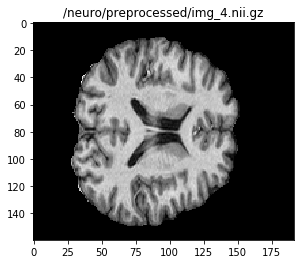

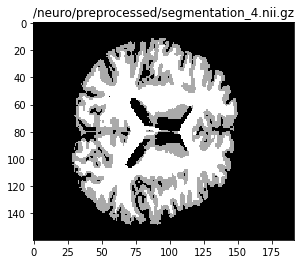

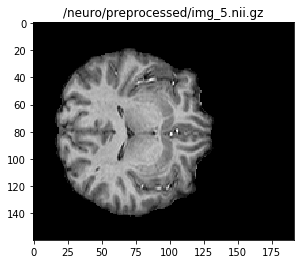

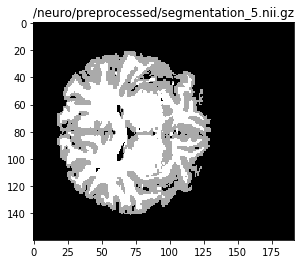

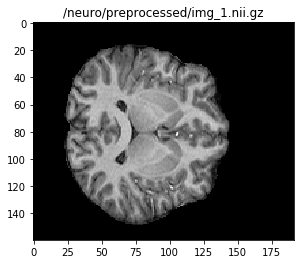

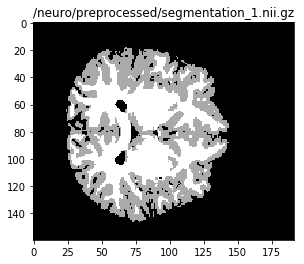

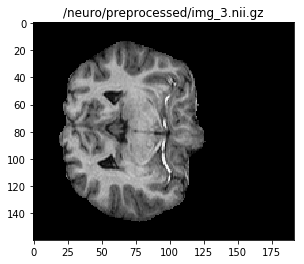

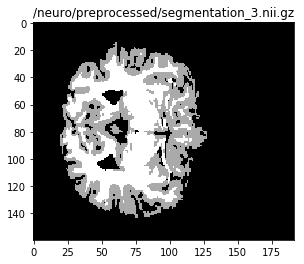

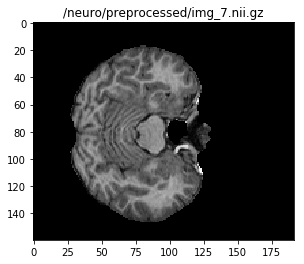

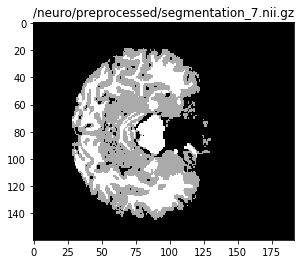

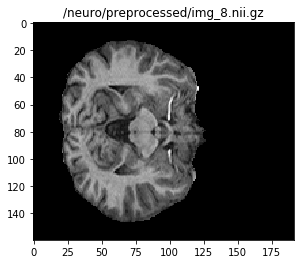

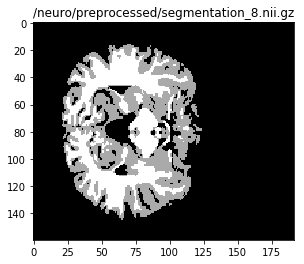

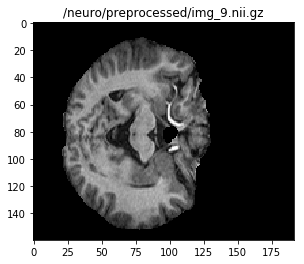

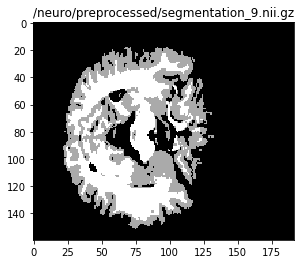

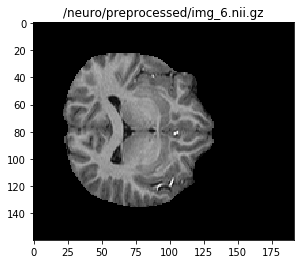

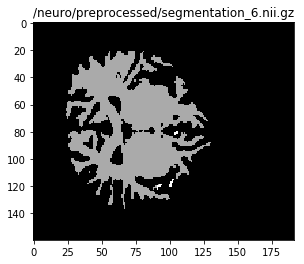

In [55]:
directory = '/neuro/preprocessed'
fpaths = glob.glob(directory + '/*.nii.gz')
for path in fpaths:
    img = nibabel.load(path)
    array = img.get_fdata()
    array = np.nan_to_num(array)
    plt.figure()
    plt.imshow(array[:,:, 100], cmap='gray')
    plt.title(path)
    
path = os.path.join(directory, 'segmentation_1.nii.gz')
img = nibabel.load(path)
array = img.get_fdata()
print(array.shape)
print(160*192*192)
print(array.dtype)
print(np.sum(array==0) + np.sum(array==1)+ np.sum(array==2)+ np.sum(array==3))

### Inspect MakeDataset

(76, 1, 128, 128)
(76, 1, 128, 128)
(76, 1, 128, 128)
(76, 1, 128, 128)


/home/user/miniconda/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


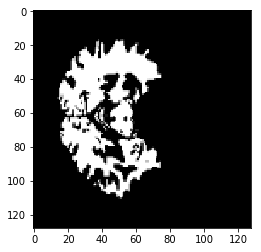

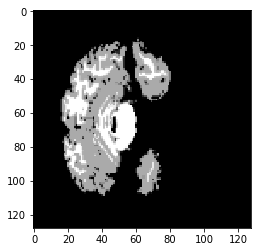

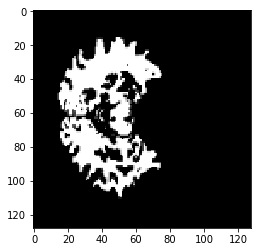

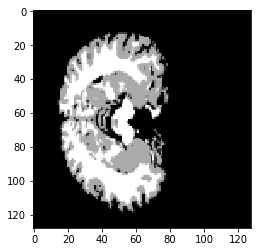

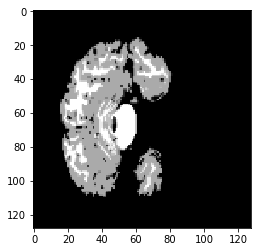

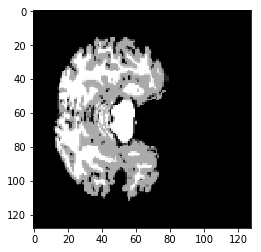

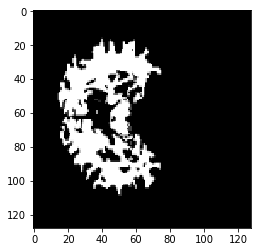

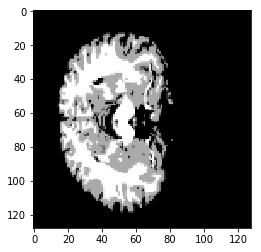

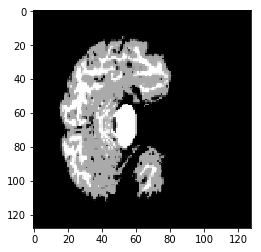

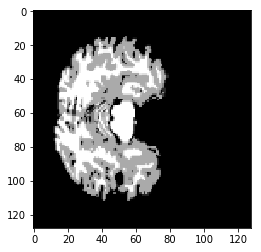

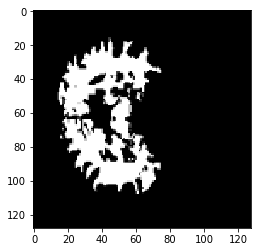

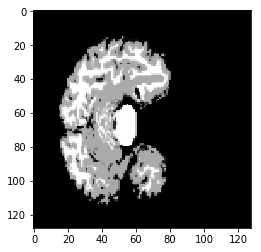

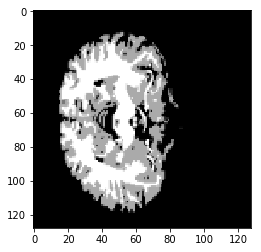

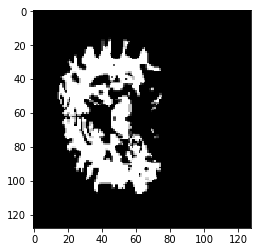

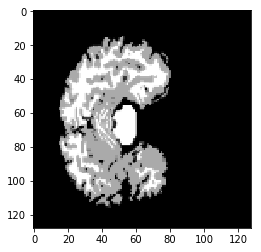

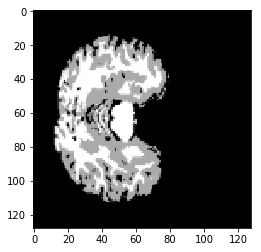

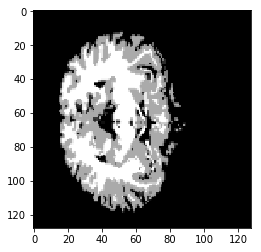

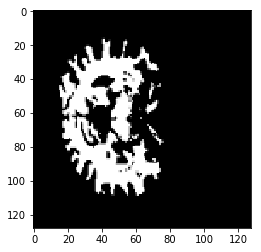

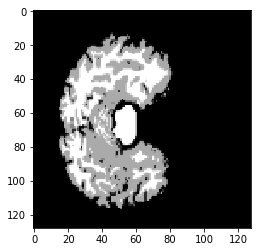

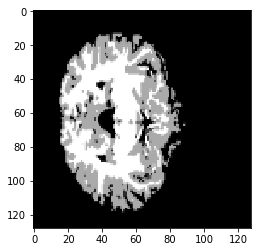

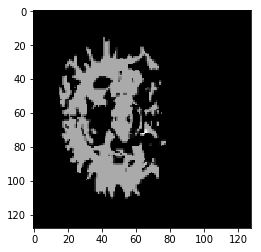

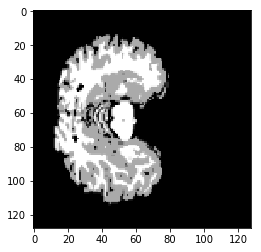

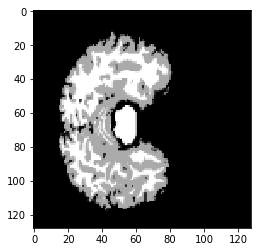

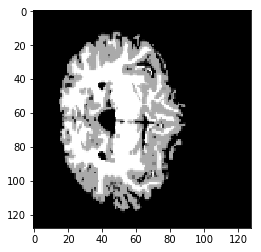

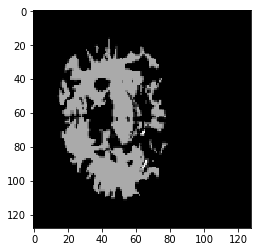

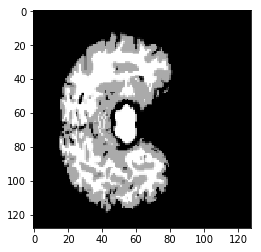

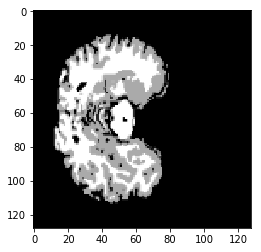

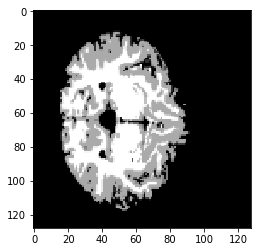

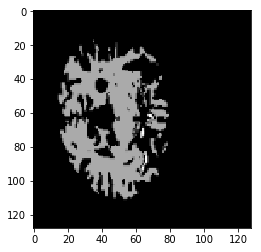

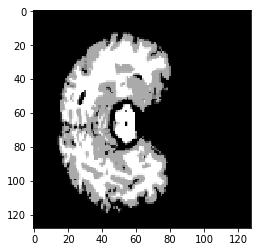

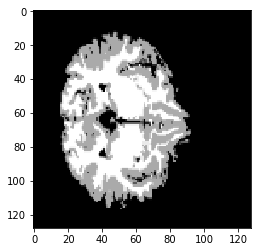

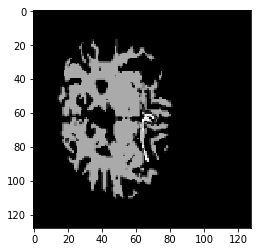

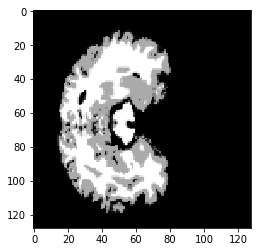

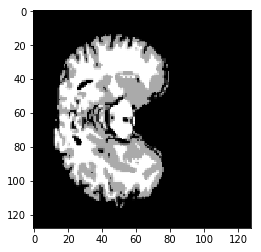

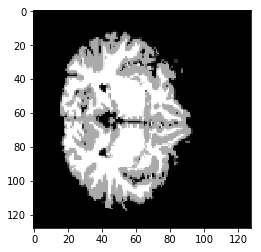

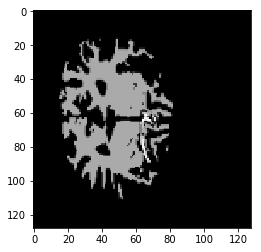

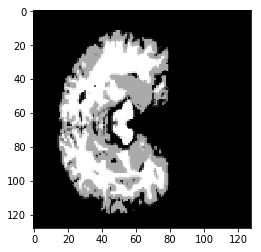

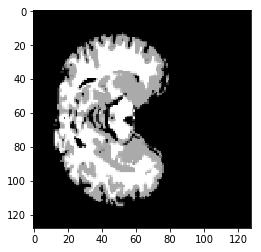

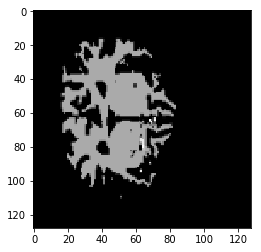

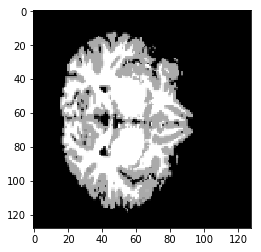

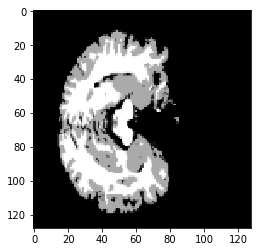

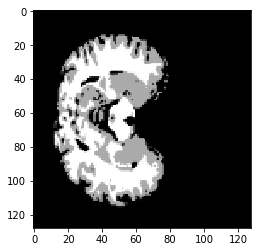

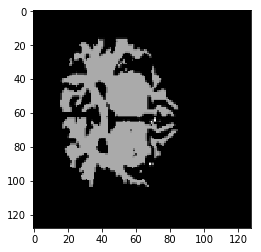

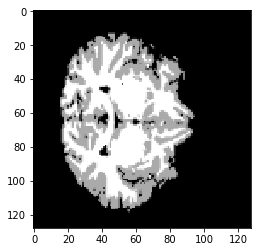

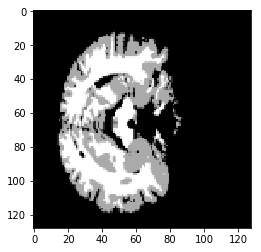

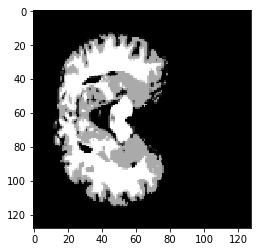

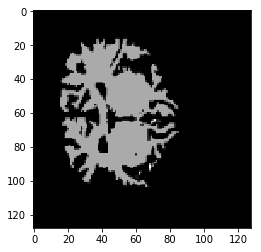

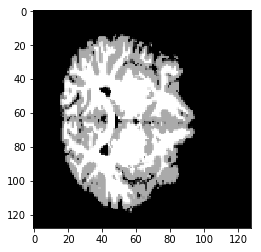

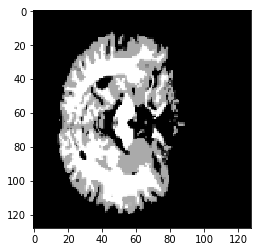

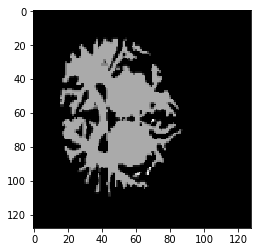

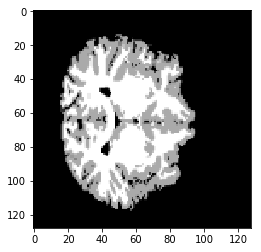

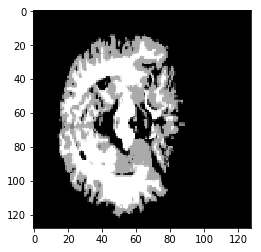

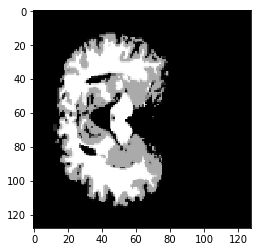

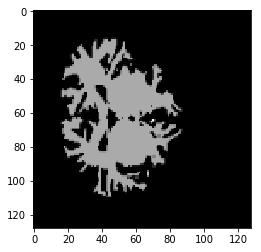

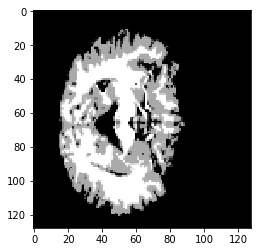

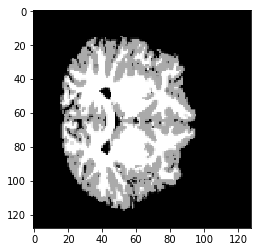

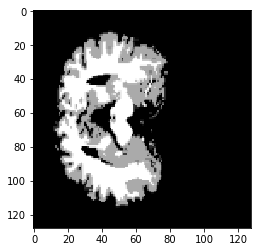

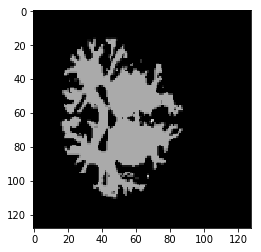

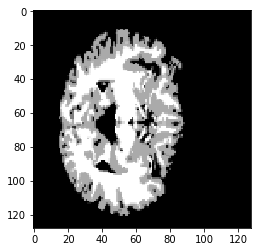

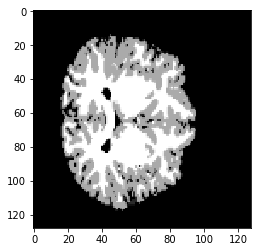

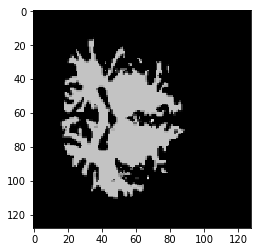

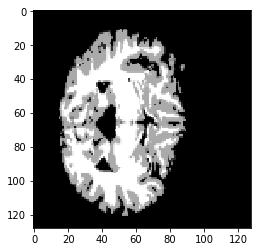

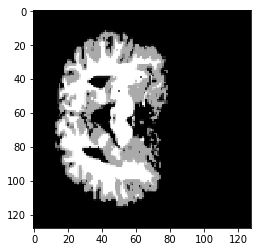

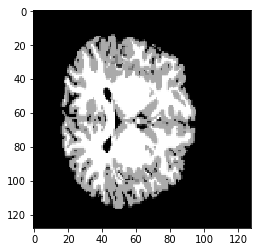

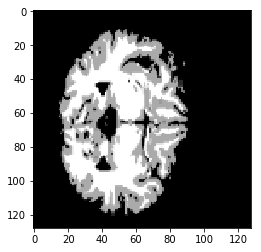

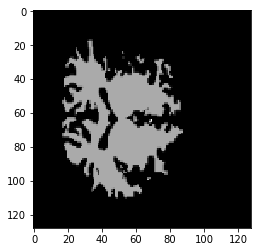

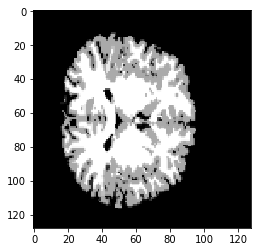

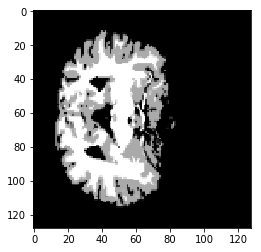

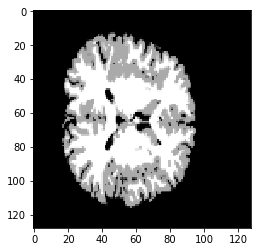

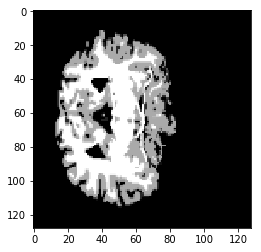

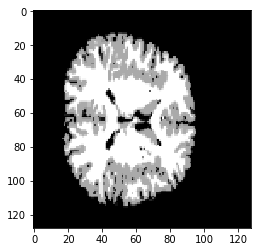

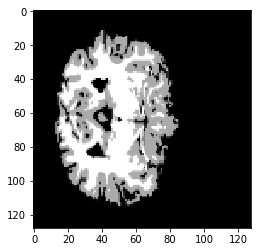

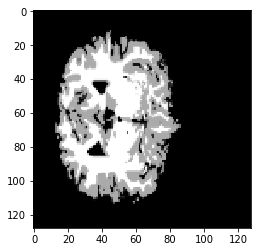

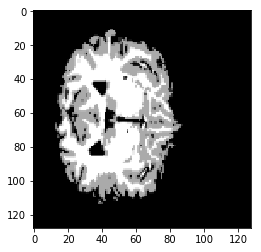

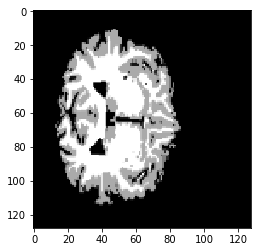

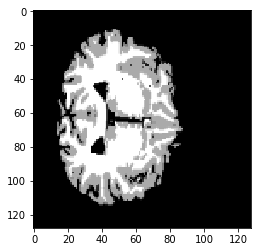

In [5]:
directory = '/neuro/train_test_datasets'
train = np.load(f'{directory}/train_img_128x128.npy')
test = np.load(f'{directory}/test_img_128x128.npy')
print(train.shape)
print(test.shape)

train = np.load(f'{directory}/train_segmentation_128x128.npy')
test = np.load(f'{directory}/test_segmentation_128x128.npy')
print(train.shape)
print(test.shape)

for img in train:
    plt.figure()
    plt.imshow(img[0], cmap='gray')

### Inspect training

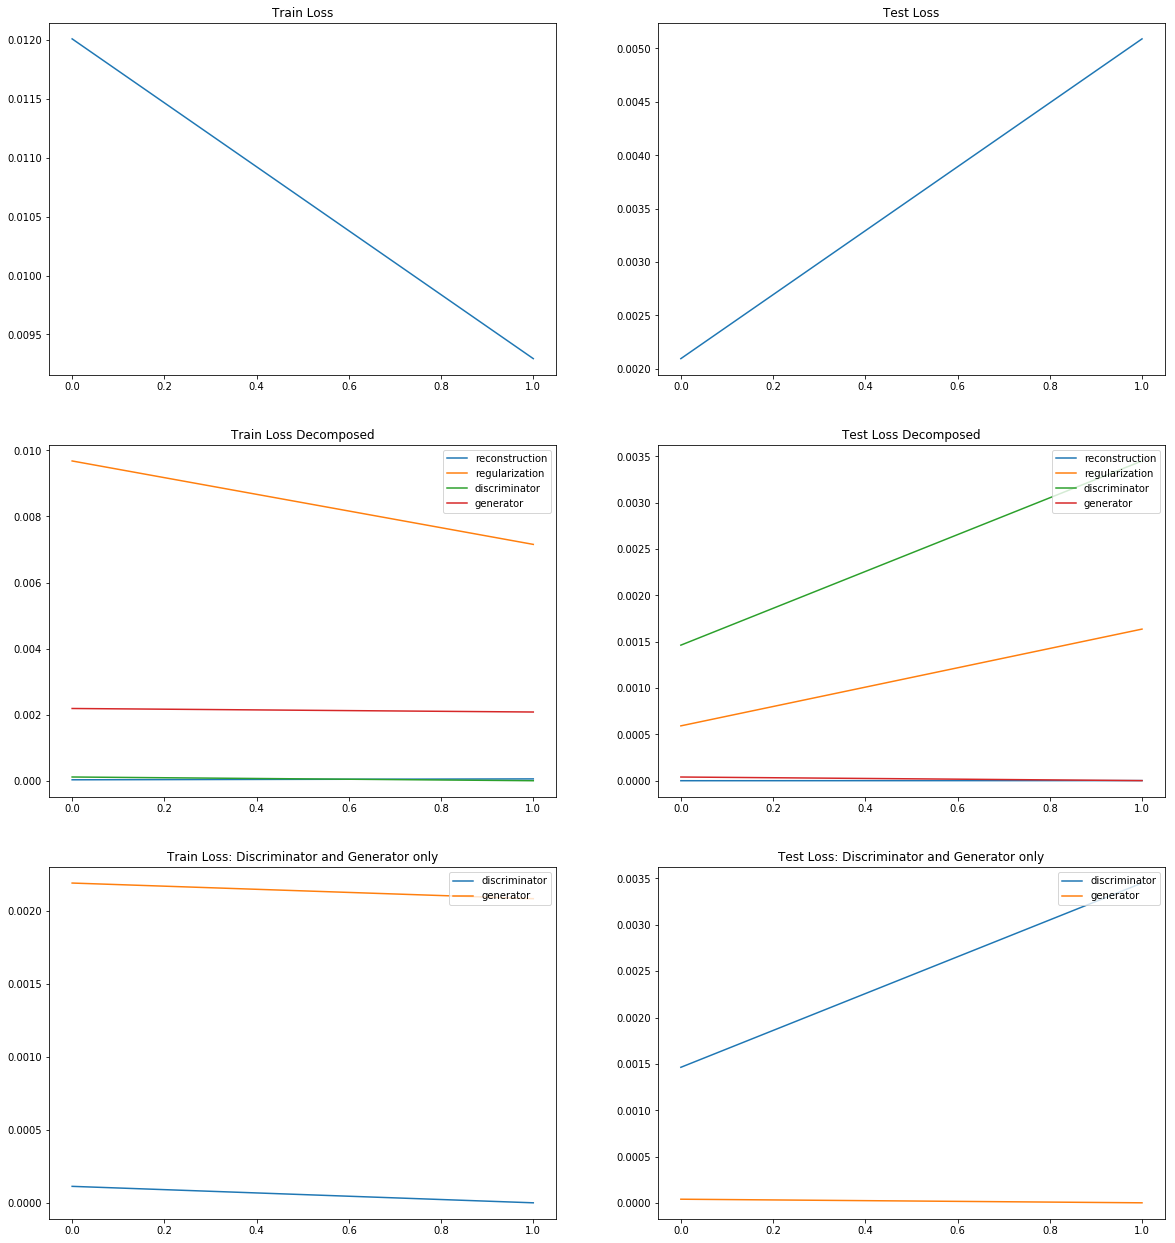

In [126]:
n_epoch = 1

loss_types = [
    'total',
    'discriminator', 'generator',
    'reconstruction', 'regularization']
train_losses = {loss_type: [] for loss_type in loss_types}
test_losses = {loss_type: [] for loss_type in loss_types}

for i in range(n_epoch+1):
    train_test = pickle.load(open(f'{PATH}/training/losses/epoch_{i}.pkl', 'rb'))
    train = train_test['train']
    test = train_test['test']

    for loss_type in loss_types:
        loss = train[loss_type]
        train_losses[loss_type].append(loss)
        
        loss = test[loss_type]
        test_losses[loss_type].append(loss)

n_rows = 3
n_cols = 2
fig = plt.figure(figsize=(20, 22))

# Total
plt.subplot(n_rows, n_cols, 1)
plt.plot(train_losses['total'])
plt.title('Train Loss')

plt.subplot(n_rows, n_cols, 2)
plt.plot(test_losses['total'])
plt.title('Test Loss')

# Decomposed in sublosses
epochs = range(n_epoch+1)

plt.subplot(n_rows, n_cols, 3)
plt.plot(epochs, train_losses['discriminator'])
plt.plot(epochs, train_losses['generator'])
plt.plot(epochs, train_losses['reconstruction'])
plt.plot(epochs, train_losses['regularization'])

plt.title('Train Loss Decomposed')
plt.legend(
    [loss_type for loss_type in loss_types if loss_type != 'total'], 
    loc='upper right')

plt.subplot(n_rows, n_cols, 4)
plt.plot(epochs, test_losses['discriminator'])
plt.plot(epochs, test_losses['generator'])
plt.plot(epochs, test_losses['reconstruction'])
plt.plot(epochs, test_losses['regularization'])

plt.title('Test Loss Decomposed')
plt.legend(
    [loss_type for loss_type in loss_types if loss_type != 'total'], 
    loc='upper right')

# Only Discriminator and Generator
plt.subplot(n_rows, n_cols, 5)
plt.plot(epochs, train_losses['discriminator'])
plt.plot(epochs, train_losses['generator'])
plt.title('Train Loss: Discriminator and Generator only')
plt.legend(
    [loss_type for loss_type in loss_types 
     if loss_type == 'discriminator' or loss_type == 'generator'], 
    loc='upper right')

plt.subplot(n_rows, n_cols, 6)
plt.plot(epochs, test_losses['discriminator'])
plt.plot(epochs, test_losses['generator'])
plt.title('Test Loss: Discriminator and Generator only')
plt.legend(
    [loss_type for loss_type in loss_types 
     if loss_type == 'discriminator' or loss_type == 'generator'], 
    loc='upper right')

0
114


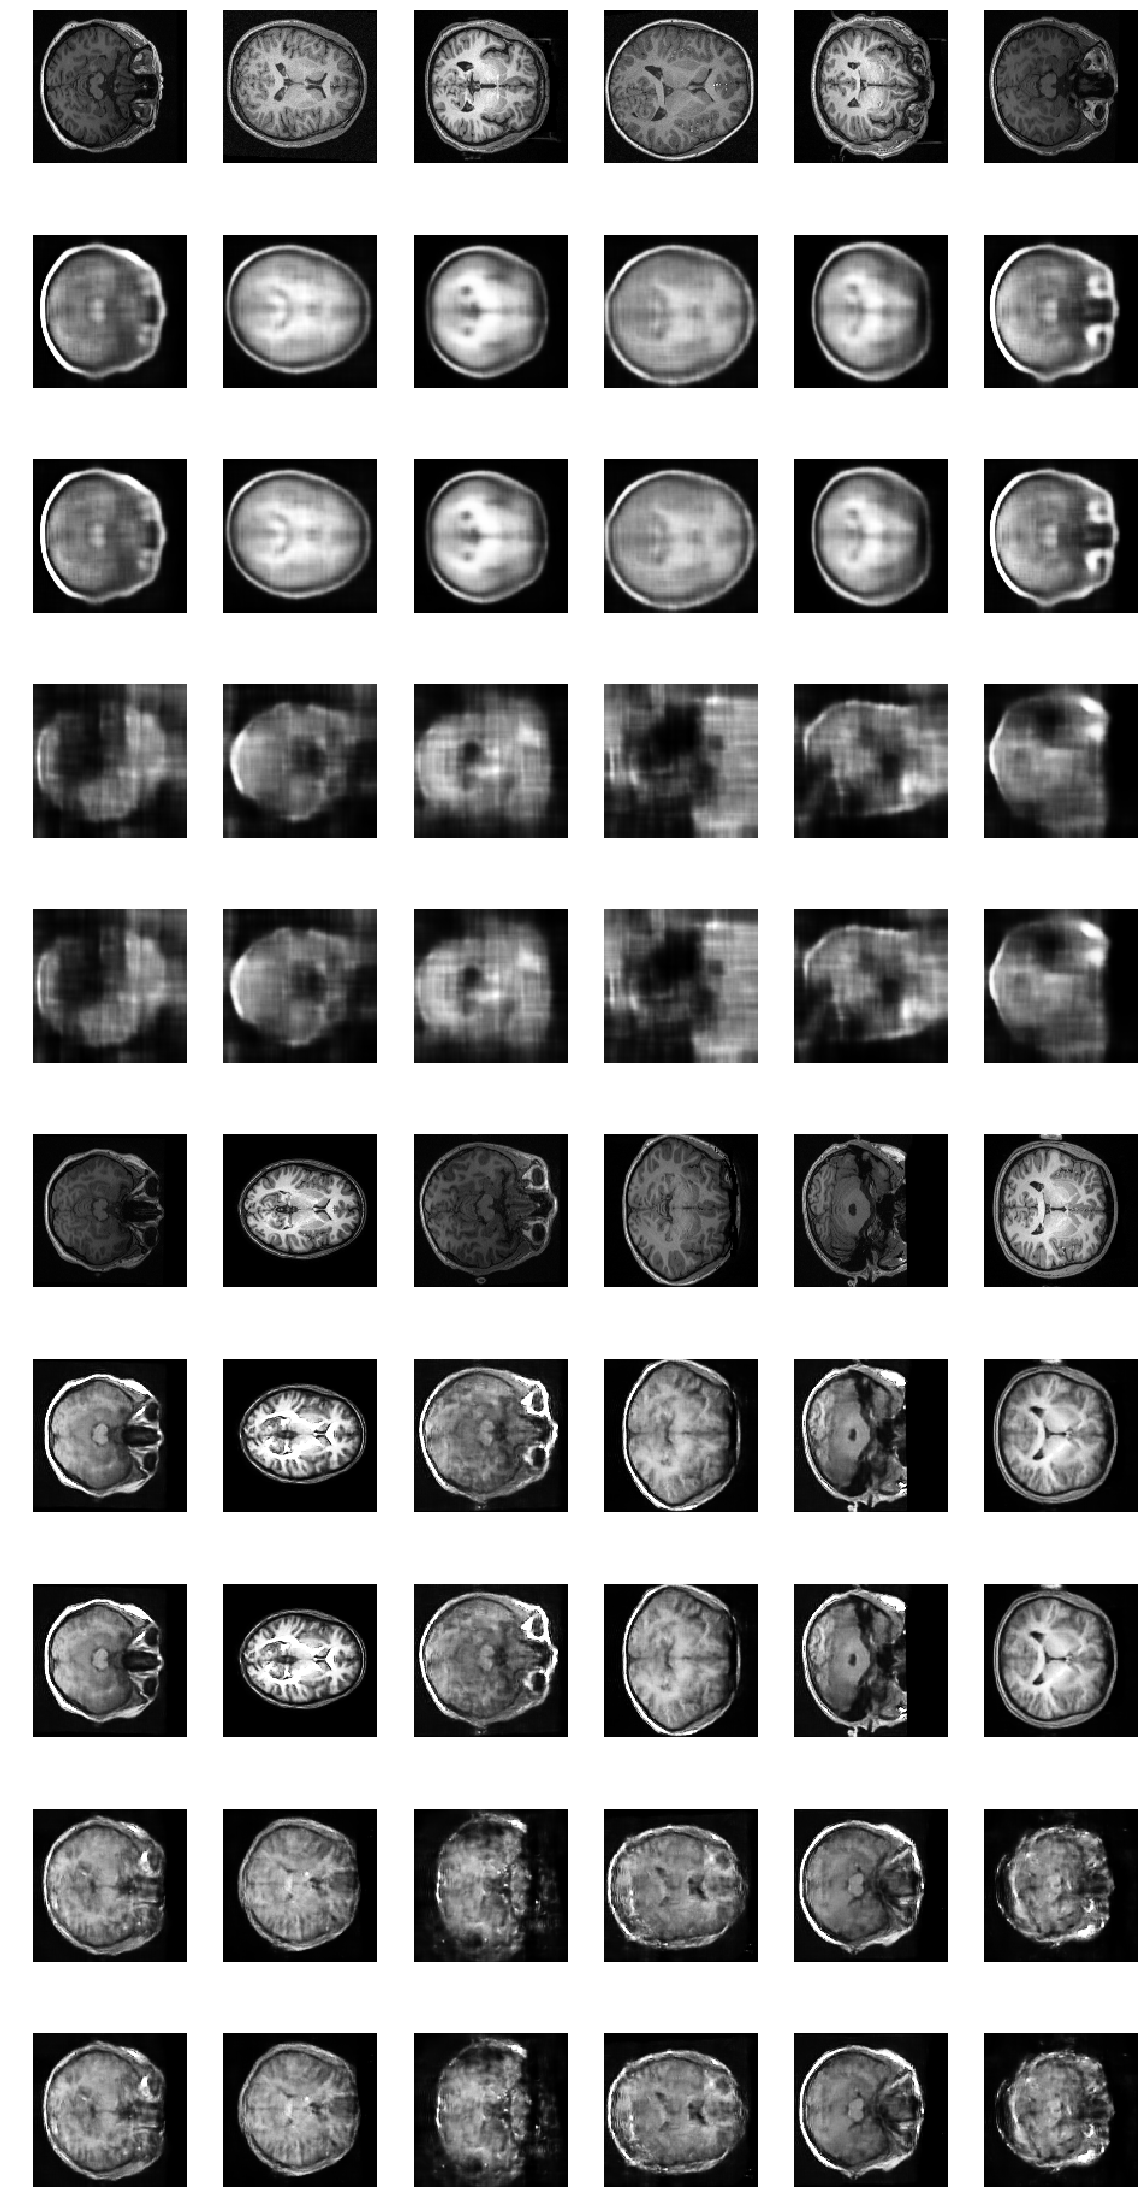

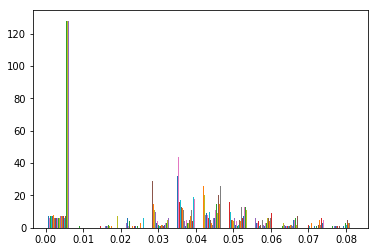

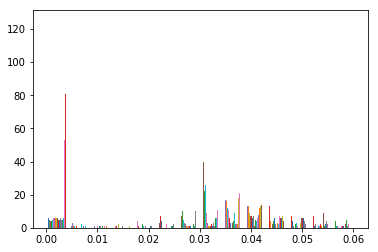

In [215]:
import scipy
from scipy import ndimage

def sharpen(img, par=0.1, alpha=40):
    filter_img = ndimage.gaussian_filter(img, par)
    sharpened = img + alpha * (img - filter_img)
    return sharpened

def median_filter(img, par=3):
    out = ndimage.median_filter(img, par)
    return out

n_epochs = 114
n_imgs = 6
by = n_epochs

n_tot = n_epochs / by + 1

fig = plt.figure(figsize=(8*n_tot, 16*n_tot))

sharp_fun = sharpen

for i in range(0, n_epochs+1, by):
    print(i)
    foo = np.load(f'{PATH}/training/imgs/epoch_{i}_data.npy')
    recon = np.load(f'{PATH}/training/imgs/epoch_{i}_recon.npy')
    recon_from_prior = np.load(f'{PATH}/training/imgs/epoch_{i}_from_prior.npy')

    for id in range(n_imgs):
        plt.subplot(5*n_tot, n_imgs, 5*i/by*n_imgs+id+1)
        plt.imshow(foo[id][0], cmap='gray')
        plt.axis('off')
        
        plt.subplot(5*n_tot, n_imgs, 5*i/by*n_imgs+n_imgs+id+1)
        plt.imshow(recon[id][0], cmap='gray')
        plt.axis('off')
        
        plt.subplot(5*n_tot, n_imgs, 5*i/by*n_imgs+2*n_imgs+id+1)
        plt.imshow(sharp_fun(recon[id][0]), cmap='gray')
        plt.axis('off')
        
        plt.subplot(5*n_tot, n_imgs, 5*i/by*n_imgs+3*n_imgs+id+1)
        plt.imshow(recon_from_prior[id][0], cmap='gray')
        plt.axis('off')
        
        plt.subplot(5*n_tot, n_imgs, 5*i/by*n_imgs+4*n_imgs+id+1)
        plt.imshow(sharp_fun(recon_from_prior[id][0]), cmap='gray')
        plt.axis('off')
        
        
        plt.tight_layout()

plt.figure()
plt.hist(foo[0][0], bins='auto')
plt.show()
plt.figure()
plt.hist(recon[0][0], bins='auto')
plt.show()

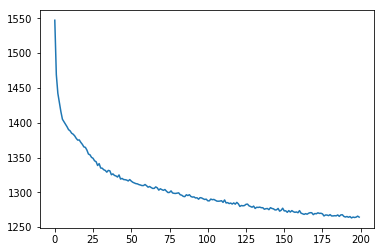

In [10]:
test = pickle.load(open(f'{PATH}/training/test_losses.pkl', 'rb'))
plt.plot(test)

# 2. Inspect the latent space

In [51]:
def load_last_model(module_name):
    models = glob.glob(f'{PATH}/training/models/*_{module_name}_*.pth')
    
    model_ids = [(int(f.split('_')[1]), f) for f in models]
    
    start_epoch, last_cp = max(model_ids, key=lambda item:item[0])
    print('Last checkpoint: ', last_cp)
    model = torch.load(last_cp, map_location=DEVICE)
    return model

In [52]:
def load_model(module_name, epoch_id):
    model = glob.glob(f'{PATH}/training/models/epoch_{epoch_id}_{module_name}_*.pth')[0]
    print('Loading: %s' % model)
    model = torch.load(model, map_location=DEVICE)
    return model

## Standard PCA on the means of the approximation of the posterior

### Load test set and compute latent codes

In [54]:
from sklearn.decomposition import PCA
N_COMPONENTS = 3

# epoch_id = 120
# encoder = load_model('encoder', epoch_id)

encoder = load_last_model('encoder')

test = np.load('/scratch/users/nmiolane/output/test.npy')

test = torch.Tensor(test)
test_dataset = torch.utils.data.TensorDataset(test)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=1, shuffle=True)

ValueError: max() arg is an empty sequence

In [50]:

# Euclidean PCA on the Gaussian means learnt by the model
mus = []
for i, data in enumerate(test_loader):
    data = data[0].to(DEVICE)
    mu, logvar = encoder(data)
    mus.append(np.array(mu.cpu().detach()))

mus = np.array(mus).squeeze()
print(mus.shape)

pca = PCA(n_components=N_COMPONENTS)
pca.fit(mus)
print(mus.shape)
projected_mus = pca.transform(mus)
print(mus.shape)

Loading: /scratch/users/nmiolane/output/training/models/epoch_120_encoder_train_loss_4473.7101_test_loss_4714.5630.pth
(5534, 50)
(5534, 50)
(5534, 50)


## Gaussian Kernel Density Estimation

In [ ]:
from scipy.stats import gaussian_kde

n_rows = 3
n_cols = 1
fig = plt.figure(figsize=(24, 36))

plt.subplot(n_rows, n_cols, 1)
plt.scatter(projected_mus[:, 0], projected_mus[:, 1])

plt.subplot(n_rows, n_cols, 2)
x = projected_mus[:, 0]
y = projected_mus[:, 1]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-4, 4, 200)
ygrid = np.linspace(-5, 5, 200)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-4, 4, -5, 5],
           cmap='Blues')
#cb = plt.colorbar()
#cb.set_label("density")

# for i in range(N_COMPONENTS):
#    mus = projected_mus[:,i]
#    print(np.std(mus))
#    plt.subplot(n_rows, n_cols, i+3)
#    plt.hist(mus, bins='auto')


## Fit a Gaussian Mixture

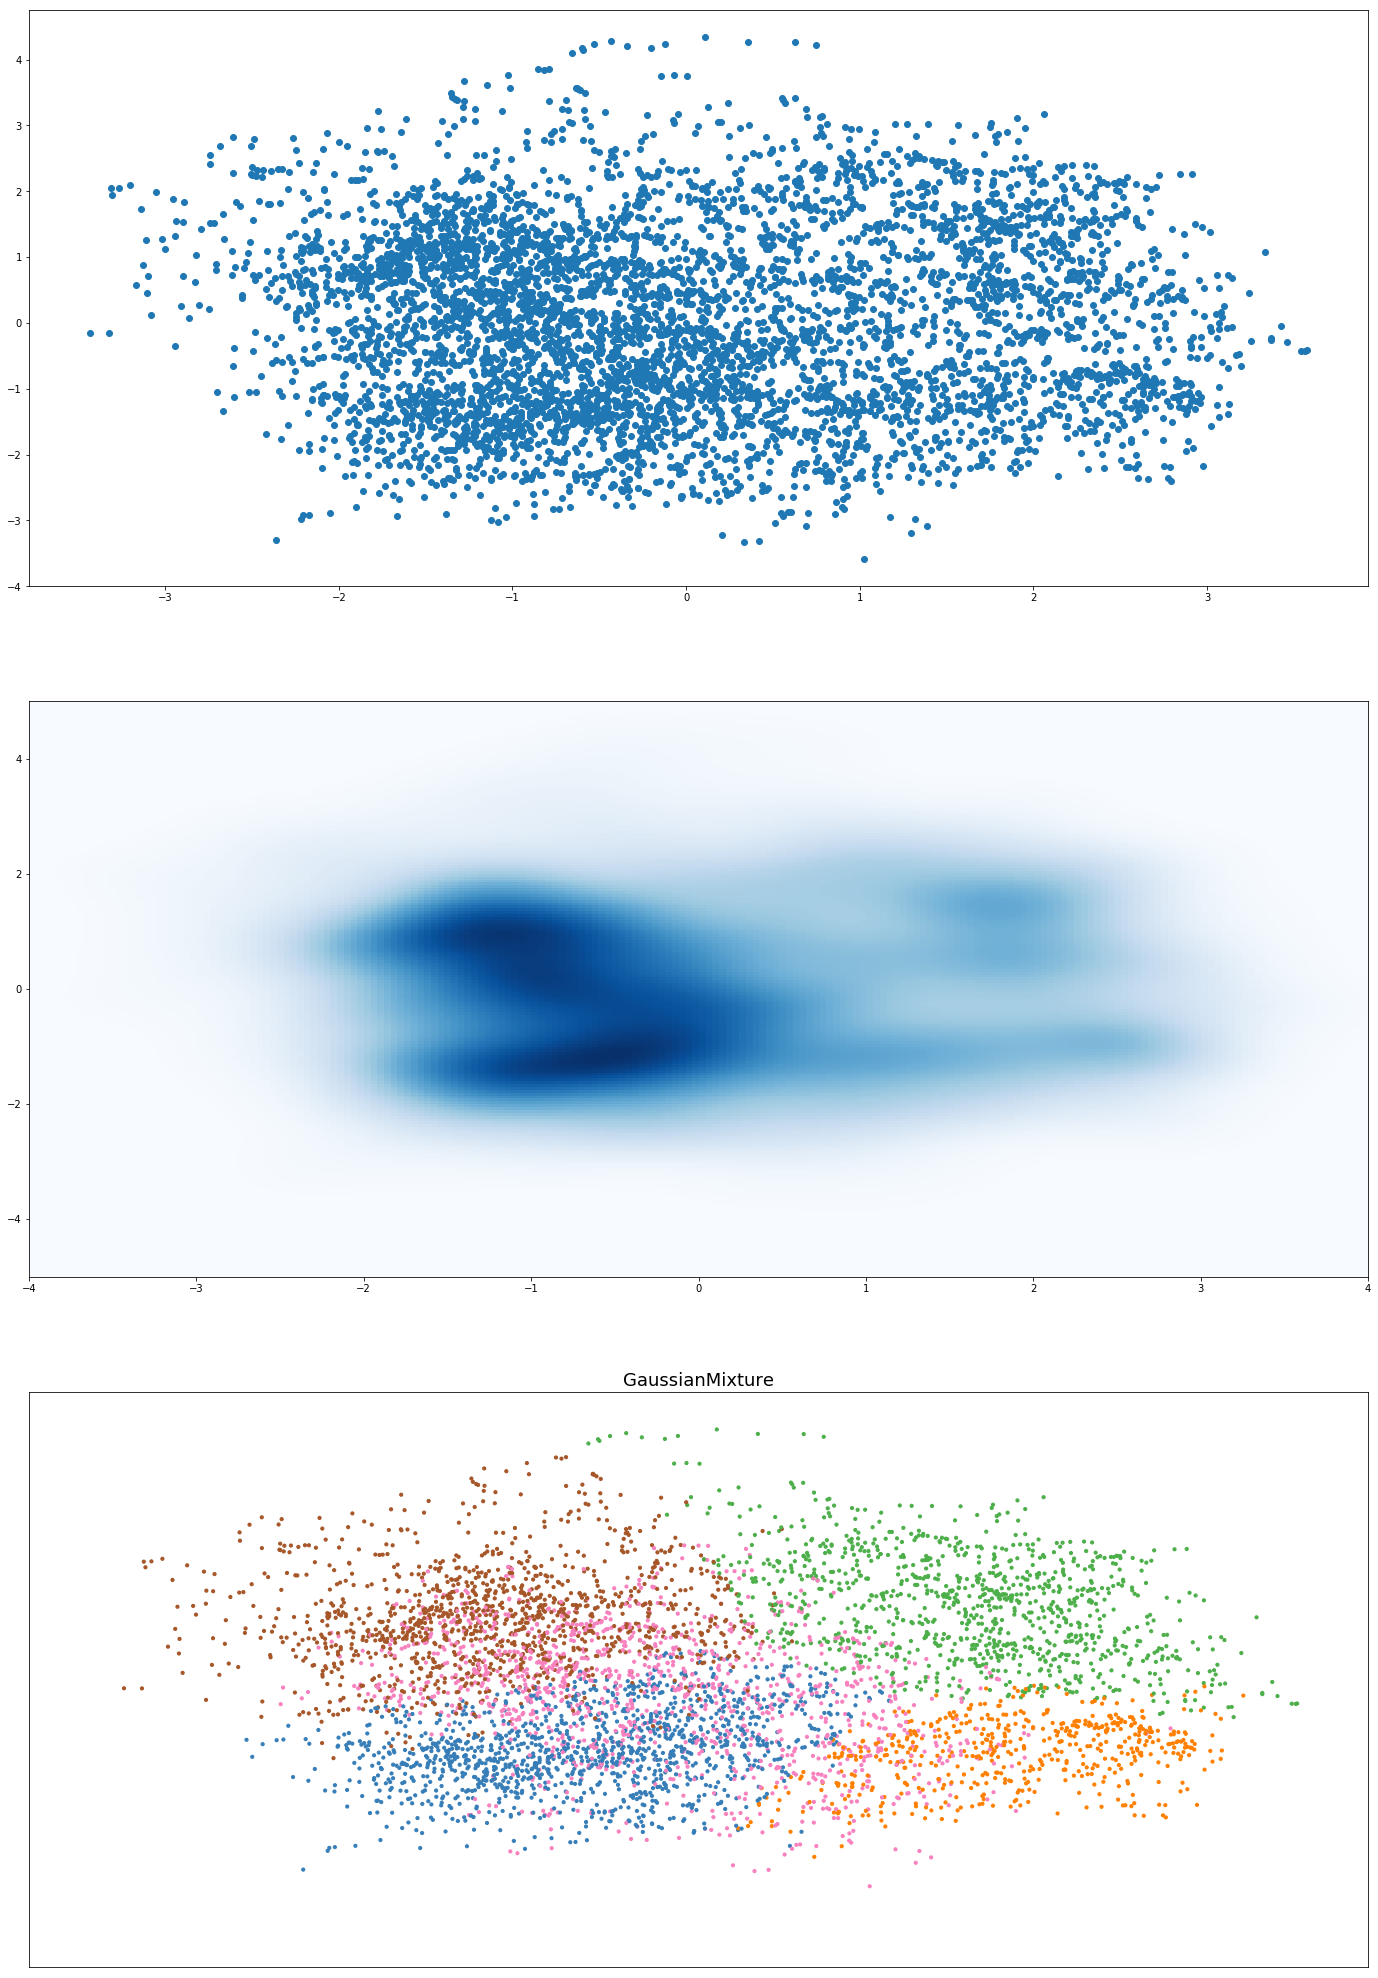

In [51]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

# Clustering
X = projected_mus
n_clusters = 5

#X = StandardScaler().fit_transform(X)
gmm = mixture.GaussianMixture(
    n_components=n_components, covariance_type='full')
algorithm = gmm
name = 'GaussianMixture'
    
algorithm.fit(X)

if hasattr(algorithm, 'labels_'):
    print('test')
    y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)

plt.subplot(n_rows, n_cols, 3)
plt.title(name, size=18)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                      '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

plt.xlim(-4, 4)
plt.ylim(-5, 5)
plt.xticks(())
plt.yticks(())

plt.show()

In [34]:
mus.shape

(5534, 50)

### Interactive exploration of PCA in each cluster

In [49]:
stds = np.zeros(N_COMPONENTS)
for i in range(N_COMPONENTS):
    stds[i] = np.std(projected_mus[:,i])
    
decoder = load_model('decoder', epoch_id)


projected = {}
pcas = {}
for i in range(n_components):
    print('Cluster: %d' % i)
    cluster = mus[y_pred==i]
    pca = PCA(n_components=N_COMPONENTS)
    pca.fit(cluster)
    projected[i] = pca.transform(cluster)
    pcas[i] = pca

    @interact(
        c1=FloatSlider(min=-3,max=3,step=0.1,value=0), 
        c2=FloatSlider(min=-3,max=3,step=0.1,value=0),
        c3=FloatSlider(min=-3,max=3,step=0.1,value=0),
        c4=FloatSlider(min=-3,max=3,step=0.1,value=0),
        c5=FloatSlider(min=-3,max=3,step=0.1,value=0))
    def display_image(c1, c2, c3, c4, c5):
        z = (c1 * pca.components_[0]
             + c2 * pca.components_[1]
             + c3 * pca.components_[2]
             + c4 * pca.components_[3]
             + c5 * pca.components_[4])
        z = torch.Tensor(z).cuda()
        recon, _ = decoder(z)
        recon = recon.squeeze()
        plt.imshow(recon.detach().cpu(), cmap='afmhot')

Loading: /scratch/users/nmiolane/output/training/models/epoch_120_decoder_train_loss_4473.7101_test_loss_4714.5630.pth
Cluster: 0


interactive(children=(FloatSlider(value=0.0, description='c1', max=3.0, min=-3.0), FloatSlider(value=0.0, desc…

Cluster: 1


interactive(children=(FloatSlider(value=0.0, description='c1', max=3.0, min=-3.0), FloatSlider(value=0.0, desc…

Cluster: 2


interactive(children=(FloatSlider(value=0.0, description='c1', max=3.0, min=-3.0), FloatSlider(value=0.0, desc…

Cluster: 3


interactive(children=(FloatSlider(value=0.0, description='c1', max=3.0, min=-3.0), FloatSlider(value=0.0, desc…

Cluster: 4


interactive(children=(FloatSlider(value=0.0, description='c1', max=3.0, min=-3.0), FloatSlider(value=0.0, desc…

### PCA in each cluster

Cluster: 0


/home/user/miniconda/envs/py36/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


Cluster: 1


/home/user/miniconda/envs/py36/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


Cluster: 2


/home/user/miniconda/envs/py36/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


Cluster: 3


/home/user/miniconda/envs/py36/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


Cluster: 4


/home/user/miniconda/envs/py36/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


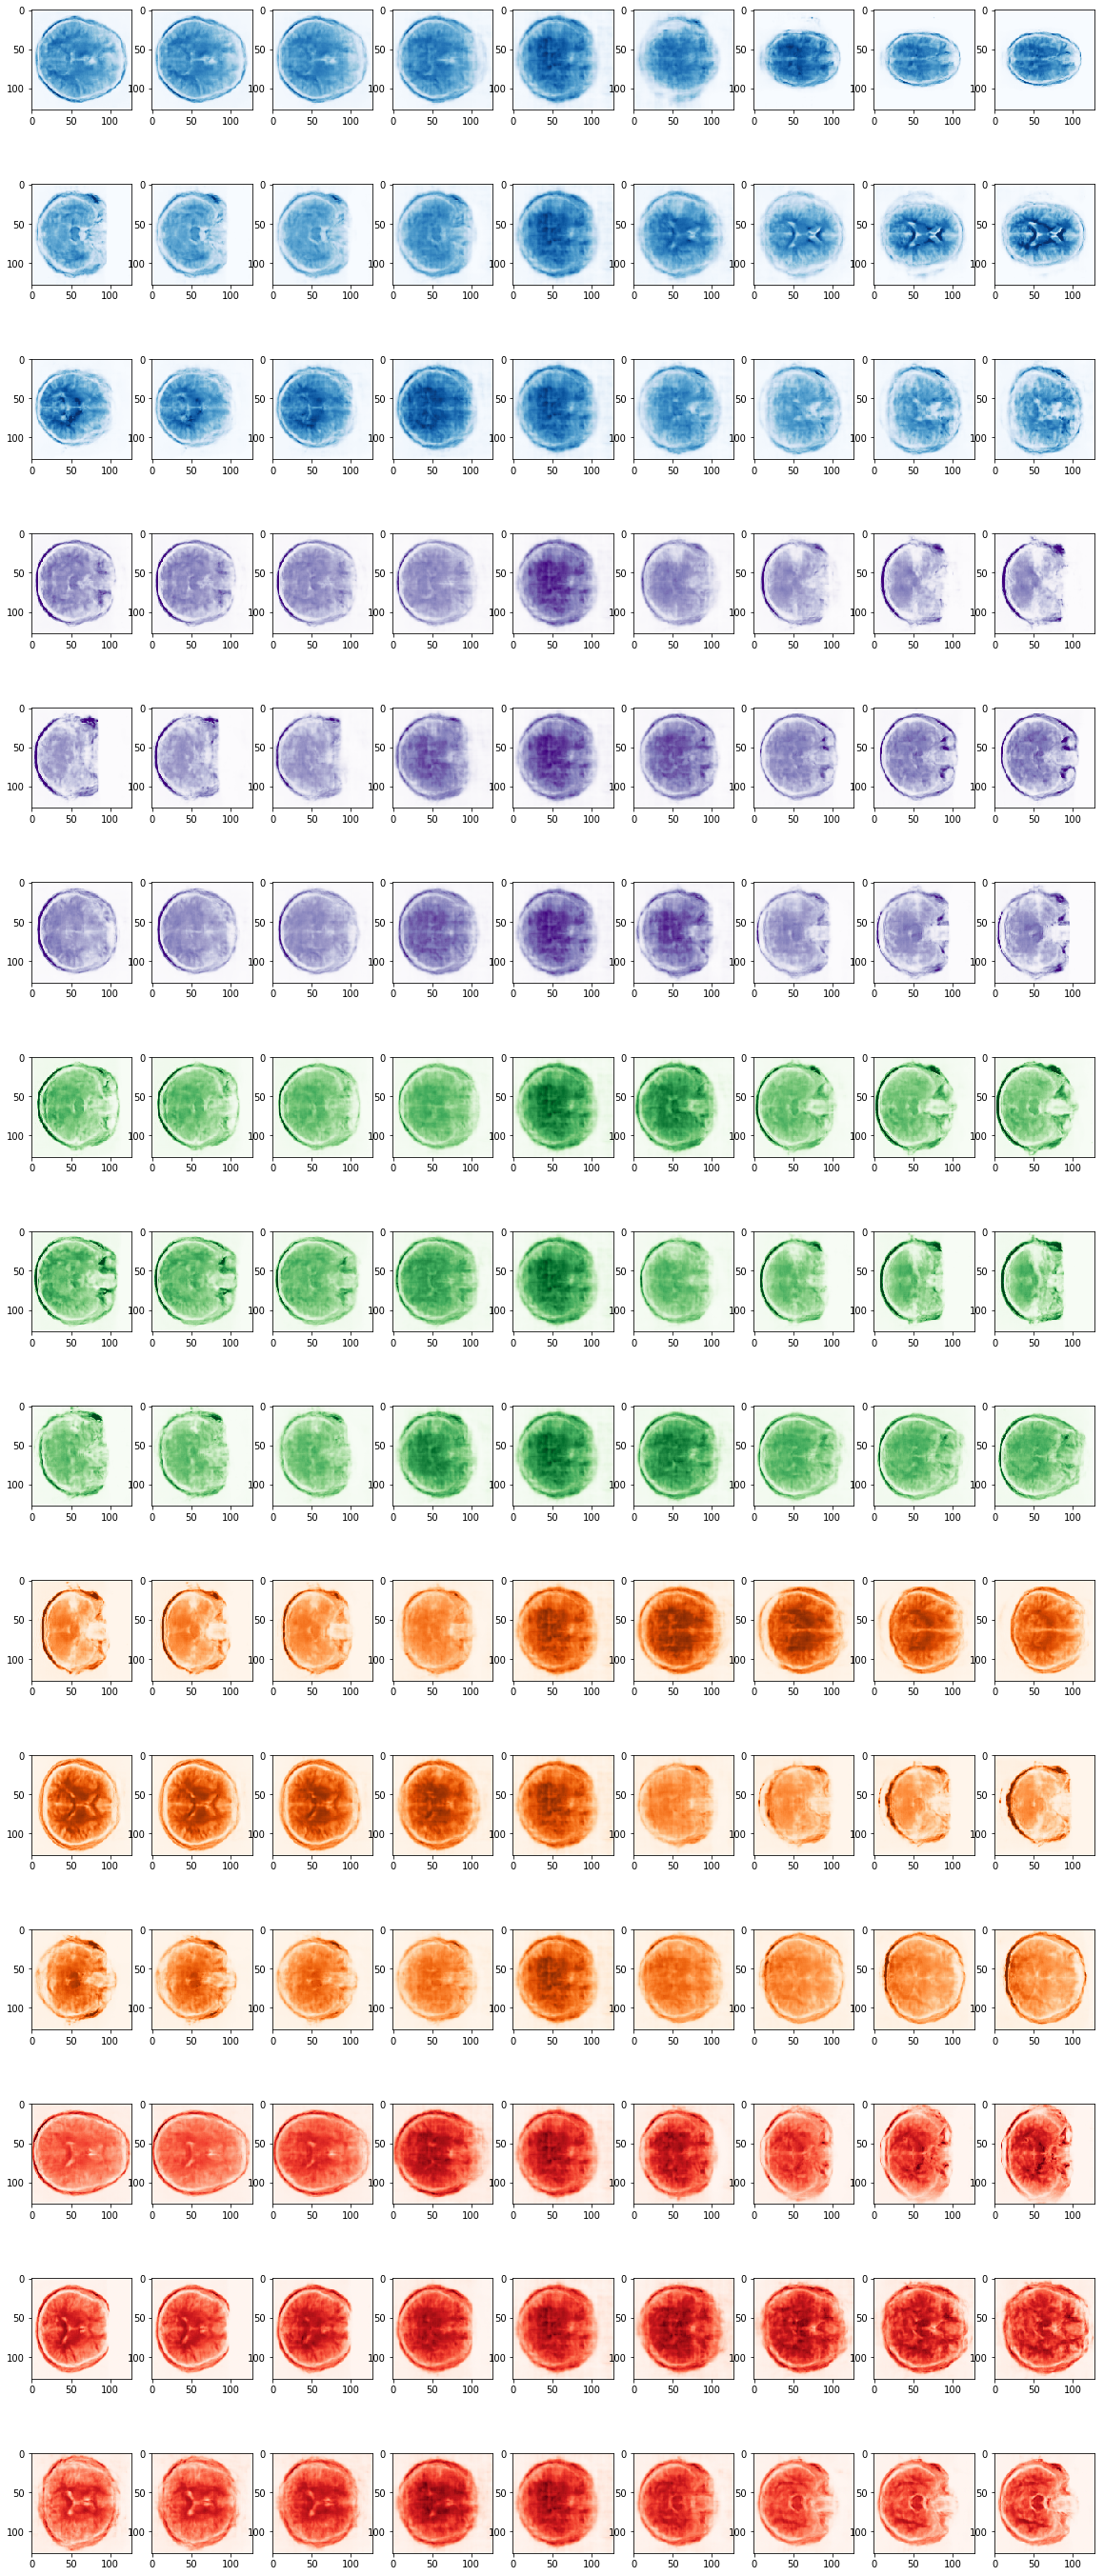

In [60]:
fig = plt.figure(figsize=(20, 50))
plt.tight_layout()
r = 4
n_cols = 2 * r + 1 

projected = {}
pcas = {}
cmaps = ['Blues', 'Purples', 'Greens', 'Oranges', 'Reds']
for i in range(n_clusters):
    cluster = mus[y_pred==i]
    pca = PCA(n_components=N_COMPONENTS)
    pca.fit(cluster)
    projected[i] = pca.transform(cluster)
    pcas[i] = pca

    for id in range(N_COMPONENTS):
        for slider in range(-r, r+1, 1):
            plt.subplot(n_clusters*N_COMPONENTS, n_cols, i * N_COMPONENTS * n_cols + id * n_cols + slider + r + 1)
            z = slider * pca.components_[id]
            z = torch.Tensor(z).cuda()
            recon, _ = decoder(z)
            recon = recon.squeeze()
            plt.imshow(recon.detach().cpu(), cmap=cmaps[i])

# 3. Inspect report created by pipeline

In [49]:
import os
import pylab

report_dir = '/scratch/users/nmiolane/output/report'
losses_path = os.path.join(report_dir, 'losses.png')
images_path = os.path.join(report_dir, 'images.png')
report_path = os.path.join(report_dir, 'report.html')

plt.figure()
img = pylab.imread(losses_path)
plt.imshow(img, aspect='auto')
plt.axis('off')

plt.figure(figsize=(30, 60))
img = pylab.imread(images_path)
plt.imshow(img)
plt.axis('off')


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/users/nmiolane/output/report/losses.png'

<Figure size 432x288 with 0 Axes>

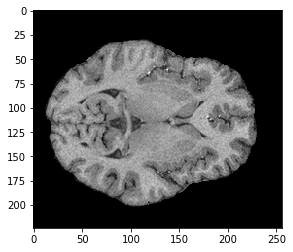

In [3]:
import nibabel
path = '/tmp/_oyiw_36_defBrainExtractionBrain.nii.gz'
img = nibabel.load(path)
array = img.get_fdata()
array = np.nan_to_num(array)
plt.imshow(array[:,:,120], cmap='gray')